<a href="https://colab.research.google.com/github/KathituCodes/Electric-Vehicle-Price-Prediction/blob/main/Electric_Vehicle_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**
The data has been split into two groups:

- training set ()
- test set ()

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each vehicle. The model will be based on “features” like the vehicle's Electric Range, Base MSRP, etc. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each vehicle. It is your job to predict these outcomes. For each vehicle, in the test set, use the model you trained to predict the expected price.





# **Data Summary**
*VIN (1-10)* - The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).

*County* - The county in which the registered owner resides.

*City* - The city in which the registered owner resides.

*State* - The state in which the registered owner resides.

*ZIP Code* - The 5-digit zip code in which the registered owner resides.

*Model Year* - The model year of the vehicle is determined by decoding the Vehicle Identification Number (VIN).

*Make* - The manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN).

*Model* - The model of the vehicle is determined by decoding the Vehicle Identification Number (VIN).

*Electric Vehicle Type* - This distinguishes the vehicle as all-electric or a plug-in hybrid.

*Clean Alternative Fuel Vehicle (CAFV) Eligibility* - This categorizes vehicles as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement.

*Electric Range* - Describes how far a vehicle can travel purely on its electric charge.

*Base MSRP* - This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.

*Legislative District* - The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.

*DOL Vehicle ID* - Unique number assigned to each vehicle by the Department of Licensing for identification purposes.

*Vehicle Location* - The center of the ZIP Code for the registered vehicle.

*Electric Utility*- This is the electric power retail service territory serving the address of the registered vehicle.

*Expected Price* - This is the expected price of the vehicle.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# **1: Load and Explore the Dataset**
## ***A. Display general information about the dataset***`

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Electric_cars_dataset.csv'
data = pd.read_csv(file_path)

# Display general information about the dataset
data.info()
print("---------------------------------------")
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,64347.000000,64346.000000,64353.000000,64353.000000,64184.000000,6.435300e+04
mean,98143.452888,2018.186212,106.948985,2524.990754,29.951904,1.972905e+08
std,2856.064329,2.726742,104.093919,12402.895104,14.661124,1.069466e+08
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372865e+08
50%,98121.000000,2018.000000,73.000000,0.000000,34.000000,1.753776e+08
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299039e+08
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08


In [ ]:
data.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


## ***B. Create a pandas profiling reports to gain insights into the dataset***
Let's generate the pandas profiling report for more insights.

In [ ]:
!pip install ydata-profiling --upgrade

In [ ]:
# Import necessary libraries
import pandas as pd
from ydata_profiling import ProfileReport
from google.colab import files

# Generate a profiling report to display in the notebook
df = pd.read_csv("/content/Electric_cars_dataset.csv")
profile = ProfileReport(df, title="EDA Report", explorative=True)
profile.to_file("output_report.html")
files.download("output_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:04<00:00,  4.32it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***C. Handle Missing and corrupted values***

The next thing is to identify and handle any missing or corrupted values in the dataset.This script does the following:

1. Loads the dataset.
2. Checks for missing values in all columns.
4. Checks for infinite values in numerical columns.
5. Checks for string 'NA' or 'NULL' values in object columns.
6. Identifies and reports any columns with potential issues.
7. Provides a summary of findings without modifying the dataset.

This approach aids to identify any potential issues in the data without making any changes to the original dataset. If issues are found, we can then decide how to handle them based on the nature of the data.

In [ ]:
import pandas as pd
import numpy as np

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Check for infinite values in numeric columns
print("\nInfinite values:")
print(np.isinf(data.select_dtypes(include=np.number)).sum())

# Check for any string 'NA' or 'NULL' values in object columns
print("\nChecking for 'NA' or 'NULL' strings in object columns:")
for col in data.select_dtypes(include=['object']):
    na_count = data[data[col].isin(['NA', 'NULL', 'na', 'null'])].shape[0]
    if na_count > 0:
        print(f"Column '{col}' has {na_count} 'NA' or 'NULL' values")

# Identify columns with potential issues
columns_with_issues = []
for col in data.columns:
    if data[col].isnull().sum() > 0:
        columns_with_issues.append(col)
    elif data[col].dtype in ['float64', 'int64'] and np.isinf(data[col]).sum() > 0:
        columns_with_issues.append(col)
    elif data[col].dtype == 'object' and data[data[col].isin(['NA', 'NULL', 'na', 'null'])].shape[0] > 0:
        columns_with_issues.append(col)

if columns_with_issues:
    print("\nColumns with potential missing or corrupt values:")
    for col in columns_with_issues:
        print(f"- {col}")
    print("\nConsider handling these issues before proceeding with analysis.")
else:
    print("\nNo missing or corrupt values detected in the dataset.")

print("\nNote: No changes have been made to the original dataset.")

Missing values:
ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price 

# **Handling Missing Values**
Impute Missing Values:

1. Categorical Columns (`County`, `City`, `State`, `Make`, `Model`, `Electric Utility`): Fill with the mode (most frequent value).
2. Numerical Columns (`ZIP Code`, `Model Year`, `Legislative District`): Fill with the median value.
3. Remove Rows with Excessive Missing Values:
  - **Vehicle Location:** Due to the high number of missing values, this column might be dropped if it doesn't contribute significantly to the model.

In [ ]:
import pandas as pd
import numpy as np

# Create a copy for cleaning
cleaned_data = data.copy()

# Function to handle missing values
def handle_missing(df, column, method='mode'):
    if method == 'mode':
        return df[column].fillna(df[column].mode()[0])
    elif method == 'median':
        return df[column].fillna(df[column].median())
    elif method == 'mean':
        return df[column].fillna(df[column].mean())

# Handle missing values for columns with issues
for col in columns_with_issues:
    if cleaned_data[col].dtype in ['float64', 'int64']:
        cleaned_data[col] = handle_missing(cleaned_data, col, 'median')
    else:
        cleaned_data[col] = handle_missing(cleaned_data, col, 'mode')

# Check for missing values in the cleaned data
print("Missing values after handling:")
print(cleaned_data.isnull().sum())

# Check for infinite values in numeric columns of cleaned data
print("\nInfinite values in cleaned data:")
print(np.isinf(cleaned_data.select_dtypes(include=np.number)).sum())

# Check for any string 'NA' or 'NULL' values in object columns of cleaned data
print("\nChecking for 'NA' or 'NULL' strings in object columns of cleaned data:")
for col in cleaned_data.select_dtypes(include=['object']):
    na_count = cleaned_data[cleaned_data[col].isin(['NA', 'NULL', 'na', 'null'])].shape[0]
    if na_count > 0:
        print(f"Column '{col}' has {na_count} 'NA' or 'NULL' values")

# Identify columns with potential issues in cleaned data
cleaned_columns_with_issues = []
for col in cleaned_data.columns:
    if cleaned_data[col].isnull().sum() > 0:
        cleaned_columns_with_issues.append(col)
    elif cleaned_data[col].dtype in ['float64', 'int64'] and np.isinf(cleaned_data[col]).sum() > 0:
        cleaned_columns_with_issues.append(col)
    elif cleaned_data[col].dtype == 'object' and cleaned_data[cleaned_data[col].isin(['NA', 'NULL', 'na', 'null'])].shape[0] > 0:
        cleaned_columns_with_issues.append(col)

if cleaned_columns_with_issues:
    print("\nColumns with potential issues after cleaning:")
    for col in cleaned_columns_with_issues:
        print(f"- {col}")
    print("\nConsider further handling of these issues.")
else:
    print("\nNo missing or corrupt values detected in the cleaned dataset.")

print("\nShape of original data:")
print(data.shape)

print("\nShape of cleaned data after handling missing values:")
print(cleaned_data.shape)

print("\nNote: The original dataset has not been modified. A new cleaned dataset has been created.")

Missing values after handling:
ID                                                   0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
Expected Price ($1k)              

# **Remove Duplicates, if they exist**
Let's check for duplicates and remove them if they exist.

In [ ]:
import pandas as pd

# Check for duplicates
duplicates = cleaned_data.duplicated().sum()

# Create a new object for the dataset without duplicates
cleaned_data_no_duplicates = cleaned_data.copy()

if duplicates > 0:
    print(f"Found {duplicates} duplicate rows in the dataset.")

    # Identify the duplicate rows
    duplicate_rows = cleaned_data[cleaned_data.duplicated(keep='first')]

    print("\nFirst few duplicate rows:")
    print(duplicate_rows.head())

    # Remove duplicates from the cleaned dataset
    cleaned_data_no_duplicates = cleaned_data_no_duplicates.drop_duplicates()

    print(f"\nAfter removing duplicates, the dataset now has {len(cleaned_data_no_duplicates)} rows.")
    print(f"Number of rows removed: {len(cleaned_data) - len(cleaned_data_no_duplicates)}")

else:
    print("No duplicate rows found in the dataset.")

print(f"\nTotal number of rows in the dataset after handling missing values: {len(cleaned_data)}")
print(f"Total number of rows in the dataset after removing duplicates: {len(cleaned_data_no_duplicates)}")

# Verify that the dataset after handling missing values remains unchanged
print(f"\nThe dataset after handling missing values still has {len(cleaned_data)} rows.")

# Note: From this point forward, use 'cleaned_data_no_duplicates' for all analyses and modeling
cleaned_data = cleaned_data_no_duplicates.copy()
print("\nThe 'cleaned_data' DataFrame has been updated to include duplicate removal.")
print(f"Final number of rows in cleaned_data: {len(cleaned_data)}")

No duplicate rows found in the dataset.

Total number of rows in the dataset after handling missing values: 64353
Total number of rows in the dataset after removing duplicates: 64353

The dataset after handling missing values still has 64353 rows.

The 'cleaned_data' DataFrame has been updated to include duplicate removal.
Final number of rows in cleaned_data: 64353


# **Handle Outliers**
We need a comprehensive view of outliers in the dataset and handle them in a way that's suitable for encoding and then SVM.

## **1. Load the set & Handle Outliers**

These functions are designed to identify, plot, and handle outliers using multiple methods.efine functions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate

# Functions to identify, plot, and handle outliers
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    z_scores = np.abs(stats.zscore(data[column]))
    z_score_outliers = data[z_scores > 3]

    median = data[column].median()
    mad = np.median(np.abs(data[column] - median))
    modified_z_scores = 0.6745 * (data[column] - median) / mad
    modified_z_score_outliers = data[np.abs(modified_z_scores) > 3.5]

    return iqr_outliers, z_score_outliers, modified_z_score_outliers

def plot_outliers(data, column):
    plt.figure(figsize=(12, 6))
    plt.scatter(data.index, data[column], alpha=0.5)
    iqr, z, mod_z = identify_outliers(data, column)
    plt.scatter(iqr.index, iqr[column], color='red', label='IQR')
    plt.scatter(z.index, z[column], color='green', label='Z-score')
    plt.scatter(mod_z.index, mod_z[column], color='orange', label='Modified Z-score')
    plt.title(f'Outliers in {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

def handle_outliers(data, column, method='cap'):
    _, _, outliers = identify_outliers(data, column)
    if method == 'cap':
        lower = data[column].quantile(0.01)
        upper = data[column].quantile(0.99)
        data[column] = data[column].clip(lower, upper)
    elif method == 'remove':
        data = data[~data.index.isin(outliers.index)]
    return data

# Plot a histogram of outliers



1. `identify_outliers` function: This function identifies outliers in a given column using three different methods:

  - **IQR method:** Outliers are identified based on the interquartile range (IQR). Data points below the lower bound or above the upper bound are considered outliers.
  - **Z-score method:** Outliers are identified based on the Z-score, which measures the number of standard deviations a data point is from the mean. Data points with a Z-score greater than 3 are considered outliers.
  - **Modified Z-score method:** This method is more robust to extreme outliers and uses the median and median absolute deviation (MAD). Data points with a modified Z-score greater than 3.5 are considered outliers.

The function returns three DataFrames, each containing the outliers identified by one of the methods.

2. `plot_outliers `function: This function plots outliers in a given column using the three methods described above. It creates a scatter plot of the data points, with outliers highlighted in different colors for each method (IQR in red, Z-score in green, Modified Z-score in orange).

3. `handle_outliers` function: This function handles outliers in a given column by either capping or removing them:

  - Capping method: Outliers are capped to the 1st and 99th percentiles of the data, effectively reducing the impact of extreme values without removing data points.
  - Removing method: Outliers are removed from the DataFrame entirely.
  
The function returns the DataFrame with outliers handled according to the specified method.


## **2. Exploratory Data Analysis (EDA):**
Here, we need to understand the distribution and characteristics of the data. It provides a summary of the dataset, creates histograms, and generates Q-Q plots for each numeric column. This helps in understanding the data distribution and potential outliers.

### **Descriptive Statistics**

In [ ]:
# Create a copy of cleaned_data for outlier handling
data_for_outliers = cleaned_data.copy()

# Print descriptive statistics
descriptive_stats = data_for_outliers.describe()
print(tabulate(descriptive_stats, headers='keys', tablefmt='pretty'))

# Get numeric columns
numeric_columns = data_for_outliers.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_columns)

+-------+--------------------+--------------------+--------------------+--------------------+----------------------+--------------------+
|       |      ZIP Code      |     Model Year     |   Electric Range   |     Base MSRP      | Legislative District |   DOL Vehicle ID   |
+-------+--------------------+--------------------+--------------------+--------------------+----------------------+--------------------+
| count |      64353.0       |      64353.0       |      64353.0       |      64353.0       |       64353.0        |      64353.0       |
| mean  | 98143.45079483475  | 2018.1861917859308 | 106.94898450732677 | 2524.990754121797  |  29.96253476916383   | 197290491.26412132 |
|  std  | 2855.9311887781473 | 2.7265940609350356 | 104.09391898355493 | 12402.895104084299 |  14.643325258597283  | 106946647.64778553 |
|  min  |       745.0        |       1993.0       |        0.0         |        0.0         |         0.0          |       4385.0       |
|  25%  |      98052.0       |    

### **Create histograms**

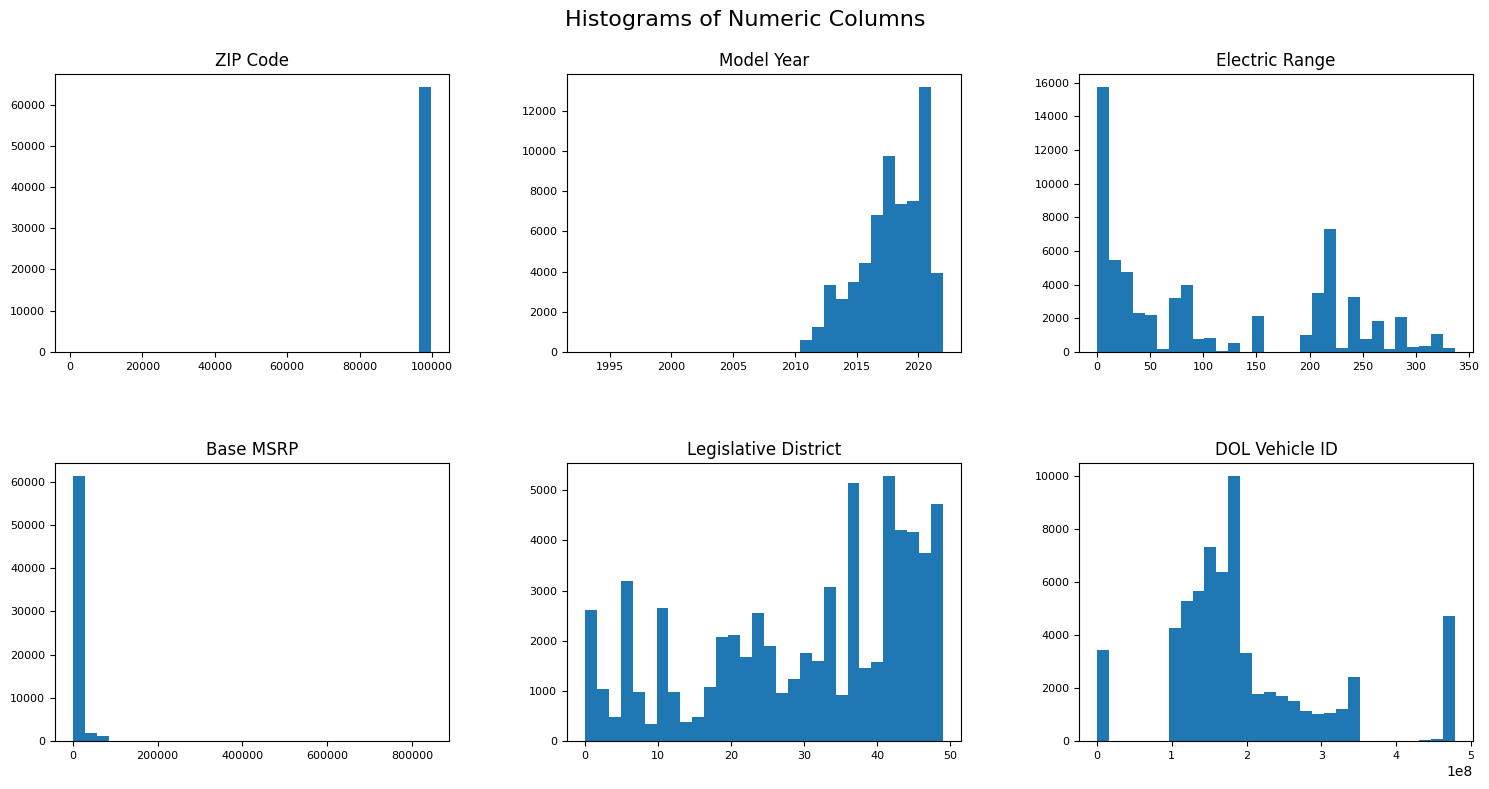

In [ ]:
# Calculate number of rows and columns for subplots
n_rows = (n_cols + 2) // 3
n_cols_plot = min(3, n_cols)

# Create histograms
fig, axes = plt.subplots(n_rows, n_cols_plot, figsize=(5 * n_cols_plot, 4 * n_rows))
fig.suptitle('Histograms of Numeric Columns', fontsize=16)

for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if n_rows > 1 else axes[col]
    ax.hist(data_for_outliers[column], bins=30)
    ax.set_title(column)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Remove any unused subplots
for i in range(n_cols, n_rows * n_cols_plot):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)
plt.show()

### Explanation of the Histogram Plots:

These plots are histograms, showing the distribution of different numerical columns in the dataset. Each plot gives an overview of how values are distributed for each feature.

#### 1. **ZIP Code**
   - The ZIP code plot shows that most values are concentrated around a specific point, which likely represents a single or a few ZIP codes appearing repeatedly in the dataset.
   - This suggests that the data might be heavily concentrated in a particular region.

#### 2. **Model Year**
   - This plot reveals that the majority of the data is focused on newer vehicles, particularly those made after 2010, with a strong concentration near 2020.
   - It indicates that the dataset likely contains newer model vehicles with only a few older ones.

#### 3. **Electric Range**
   - The electric range (presumably of electric vehicles) shows a high concentration of values between 0 and 100, meaning that many vehicles in the dataset have a relatively short electric range.
   - There's a secondary concentration near 250, possibly representing a class of vehicles with longer ranges.

#### 4. **Base MSRP (Manufacturer's Suggested Retail Price)**
   - Most data points are concentrated at the lower end of the price spectrum, meaning that most vehicles in the dataset are relatively inexpensive.
   - There is a long tail, indicating a few very expensive vehicles (outliers).

#### 5. **Legislative District**
   - The values are relatively evenly distributed across different legislative districts, but there is a slight increase in frequency in districts between 40 and 50.
   - This suggests a fairly even distribution of vehicles across different political areas, with a concentration in some specific districts.

#### 6. **DOL Vehicle ID**
   - The Department of Licensing (DOL) Vehicle ID values show some distinct peaks. This could indicate batch processing of registrations or licensing, where vehicles were processed or registered in groups.


### **Create Q-Q plots**
Methodology:
1. Numeric columns: Numeric columns of the dataset are identified.
2. Histograms: Histograms for each numeric column are created.
3. Q-Q plots: Q-Q plots for each numeric column are created to assess normality.
4. Handling outliers: Outliers in each numeric column are handled using the 'cap' method.
5. Plotting outliers after handling: Outliers for each column are plotted after handling them to visualize the impact of the outlier handling.

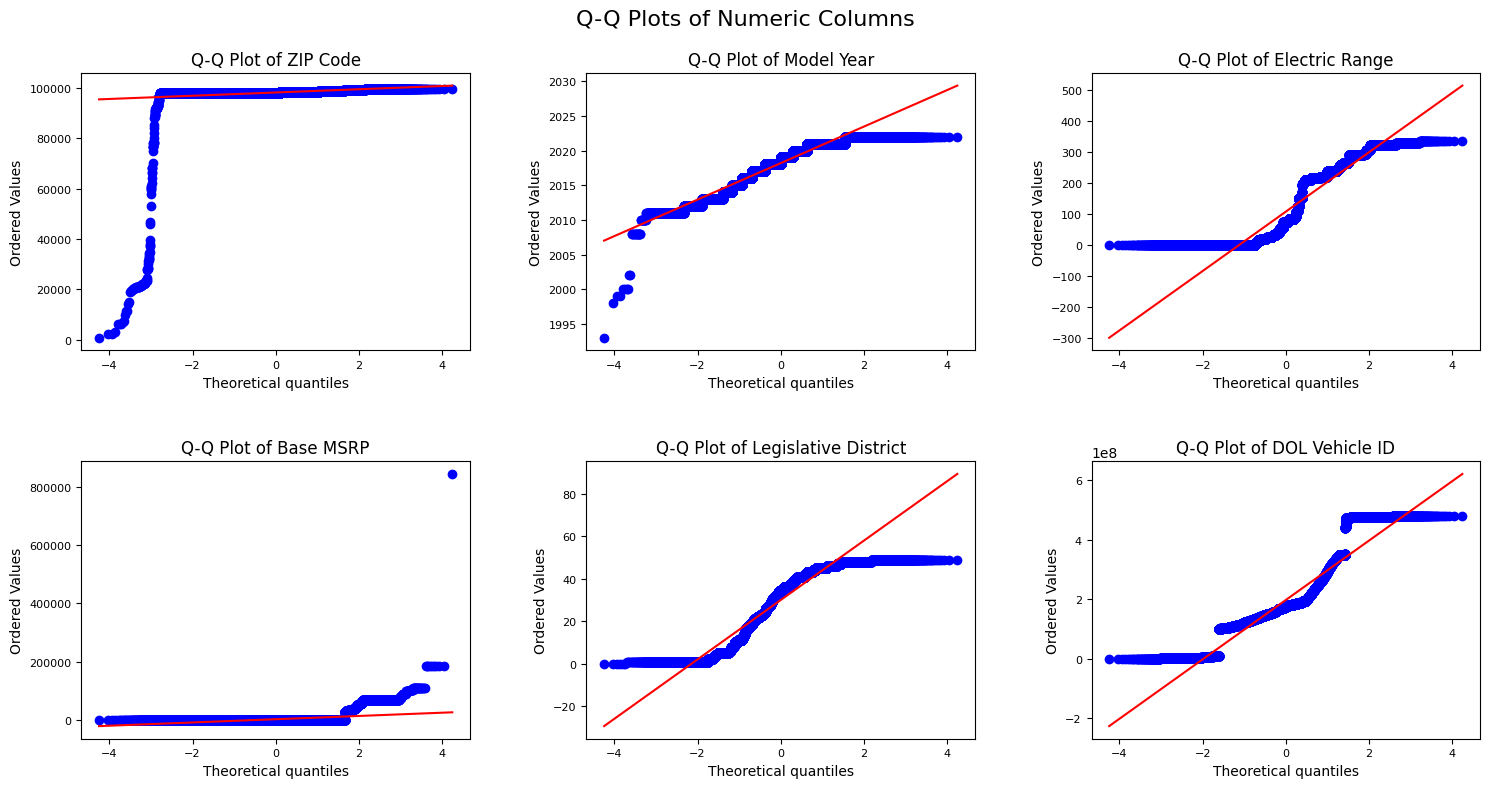

In [ ]:
# Create Q-Q plots
fig, axes = plt.subplots(n_rows, n_cols_plot, figsize=(5 * n_cols_plot, 4 * n_rows))
fig.suptitle('Q-Q Plots of Numeric Columns', fontsize=16)

for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if n_rows > 1 else axes[col]
    stats.probplot(data_for_outliers[column], dist="norm", plot=ax)
    ax.set_title(f"Q-Q Plot of {column}")
    ax.tick_params(axis='both', which='major', labelsize=8)

# Remove any unused subplots
for i in range(n_cols, n_rows * n_cols_plot):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)
plt.show()

### Explanation of Q-Q Plots:

A **Q-Q (Quantile-Quantile) plot** is a graphical tool used to assess whether or not a dataset follows a particular distribution, typically the normal (Gaussian) distribution. The red line in the Q-Q plots represents the theoretical distribution (usually normal), and the blue dots represent the actual data points.

If the points lie along the red line, the data is well-modeled by a normal distribution. Deviations from this line suggest that the data might be skewed, have heavy tails, or be distributed in some other way.

#### 1. **Q-Q Plot of ZIP Code**
   - The curve sharply rises away from the red line, which indicates that the ZIP code values are far from normally distributed.
   - This is expected because ZIP codes are categorical, not continuous or normally distributed. Therefore, a Q-Q plot is not particularly meaningful for ZIP codes.

#### 2. **Q-Q Plot of Model Year**
   - There’s a noticeable deviation from the line on the lower end, showing that older vehicles (from earlier model years) deviate from a normal distribution.
   - Most of the points align with the red line for recent model years (around 2010 and later), indicating that data points from more recent years are somewhat normally distributed, but older vehicles deviate significantly.

#### 3. **Q-Q Plot of Electric Range**
   - The S-shaped curve suggests a **bimodal distribution** or heavy tails, where the data is skewed both to the lower and higher ranges.
   - Electric ranges have many values clustered at the lower and upper ends (e.g., very short and very long ranges), which deviates from a normal distribution, as seen by the points moving away from the line at both extremes.

#### 4. **Q-Q Plot of Base MSRP**
   - The points remain close to the red line for lower values, but there are extreme deviations at the upper end, indicating the presence of outliers (very expensive vehicles).
   - This suggests that the **Base MSRP** is heavily skewed, with a few outliers much higher than the majority of the data.

#### 5. **Q-Q Plot of Legislative District**
   - The plot shows a deviation from the line, forming a slight S-shape.
   - This indicates that the distribution of **Legislative Districts** is not normally distributed but has some form of skew or structure to it.

#### 6. **Q-Q Plot of DOL Vehicle ID**
   - There are strong deviations from the red line at both the low and high ends.
   - This suggests that the **DOL Vehicle ID** (likely a unique identifier) does not follow a normal distribution, which is expected, as IDs are generally not meant to follow such a distribution.

### Key Takeaways:
- Most of the columns, such as **ZIP Code**, **Model Year**, **Electric Range**, and **Base MSRP**, do not follow a normal distribution. Some show signs of heavy tails, skewness, or even bimodal distributions.
- Q-Q plots are useful for visually assessing how data deviates from normality. If the data follows a normal distribution, we would expect the points to fall roughly along the red line, which is not the case for most of these plots.

### **Identify & Plot Outliers**
Here we identify and visualize outliers for each numeric column using multiple methods.


Outliers in ZIP Code:
IQR method: 3892
Z-score method: 119
Modified Z-score method: 7562


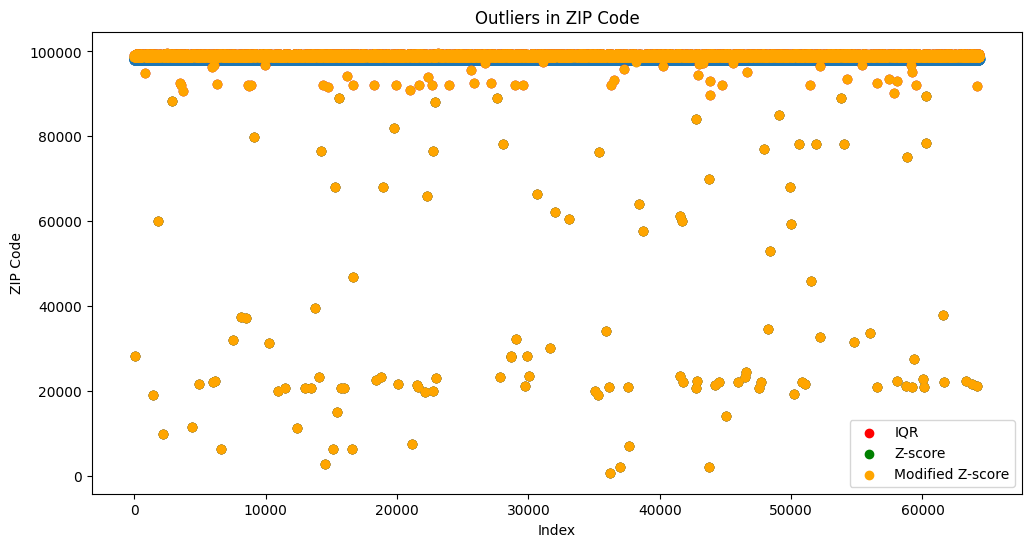


Outliers in Model Year:
IQR method: 38
Z-score method: 38
Modified Z-score method: 10


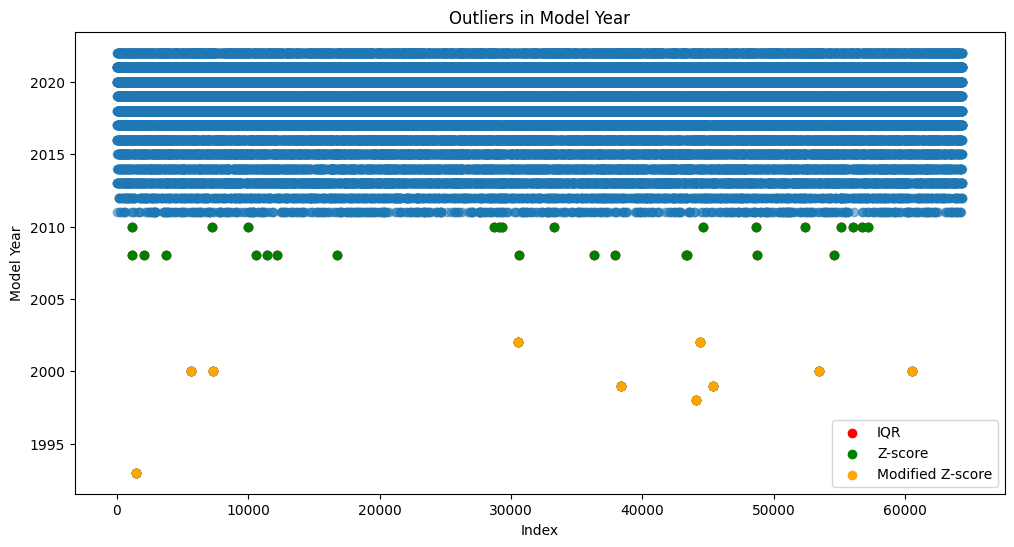


Outliers in Electric Range:
IQR method: 0
Z-score method: 0
Modified Z-score method: 0


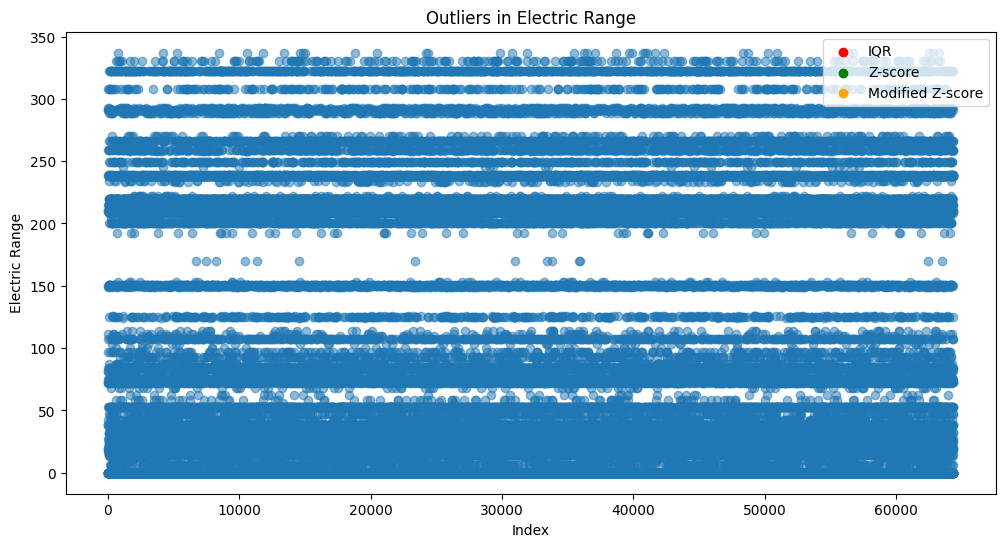


Outliers in Base MSRP:
IQR method: 3090
Z-score method: 1833
Modified Z-score method: 3090


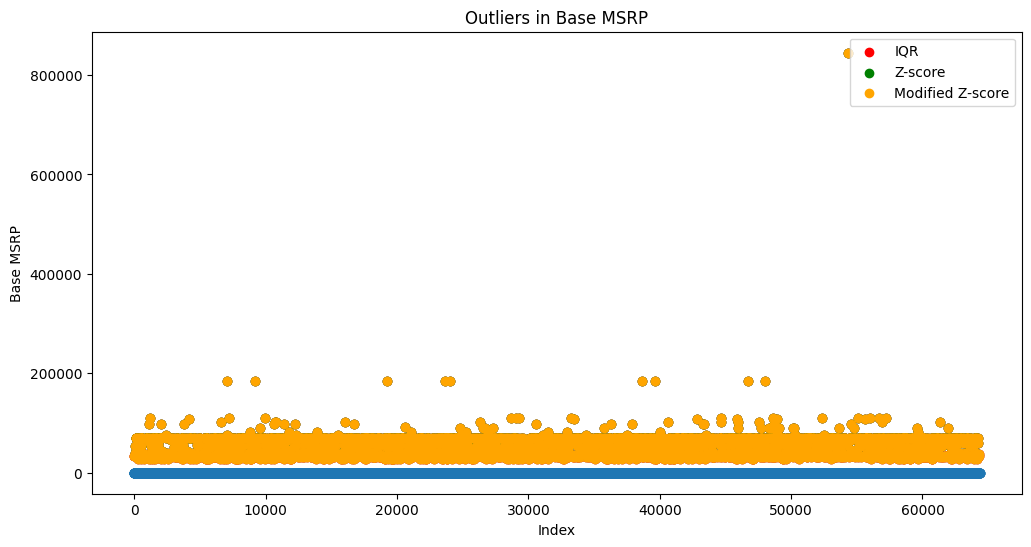


Outliers in Legislative District:
IQR method: 0
Z-score method: 0
Modified Z-score method: 0


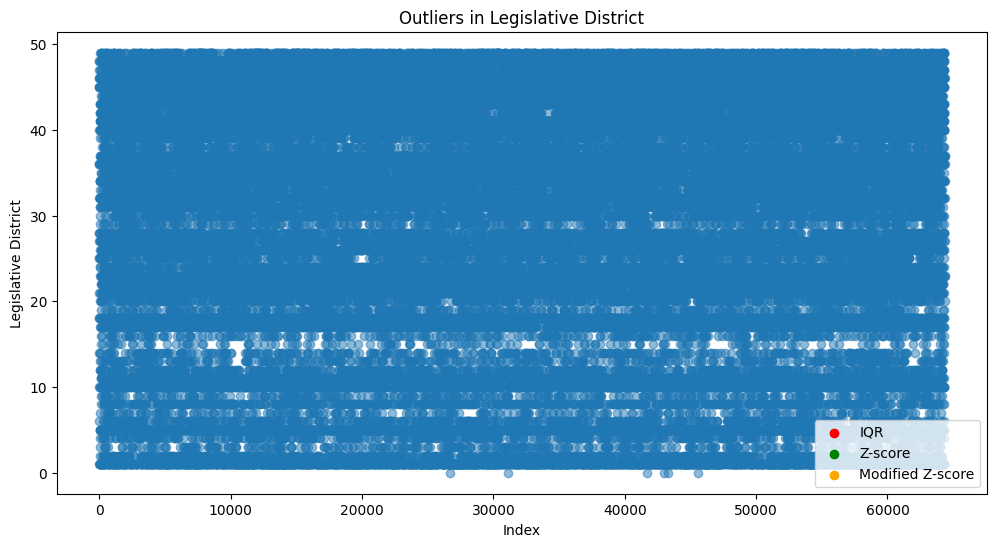


Outliers in DOL Vehicle ID:
IQR method: 4878
Z-score method: 0
Modified Z-score method: 4878


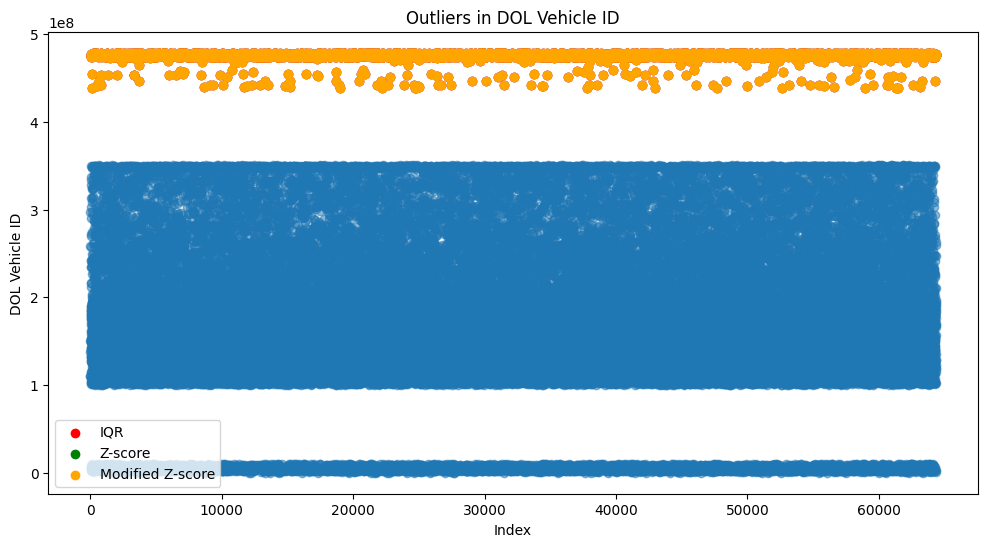

In [ ]:
for column in numeric_columns:
    iqr, z, mod_z = identify_outliers(data_for_outliers, column)
    print(f"\nOutliers in {column}:")
    print(f"IQR method: {len(iqr)}")
    print(f"Z-score method: {len(z)}")
    print(f"Modified Z-score method: {len(mod_z)}")
    plot_outliers(data_for_outliers, column)

### **Handle Outliers & Compare Results**
**The Cap Method**

Instead of removing outliers, I decided to cap them at the 1st and 99th percentiles. It preserves data points while mitigating the impact of extreme values.

In [ ]:
data_no_outliers = data_for_outliers.copy()

for column in numeric_columns:
    data_no_outliers = handle_outliers(data_no_outliers, column, method='cap')

# Compare shapes
shapes = [
    ["Original", data_for_outliers.shape[0], data_for_outliers.shape[1]],
    ["After handling outliers", data_no_outliers.shape[0], data_no_outliers.shape[1]]
]
print(tabulate(shapes, headers=["Dataset", "Rows", "Columns"], tablefmt="grid"))

# Compare summary statistics
print("\nBefore outlier handling:")
print(tabulate(data_for_outliers.describe().T, headers="keys", tablefmt="grid", floatfmt=".2f"))

print("\nAfter outlier handling:")
print(tabulate(data_no_outliers.describe().T, headers="keys", tablefmt="grid", floatfmt=".2f"))

# Count the number of changes
changes = (data_for_outliers != data_no_outliers).sum()
changes_table = [[column, count] for column, count in changes.items()]
print("\nNumber of values changed in each column:")
print(tabulate(changes_table, headers=["Column", "Changes"], tablefmt="grid"))

print("\nNote: The original 'cleaned_data' DataFrame remains unchanged.")
print("Use 'data_no_outliers' for further analysis with outliers handled.")

+-------------------------+--------+-----------+
| Dataset                 |   Rows |   Columns |
+=========================+========+===========+
| Original                |  64353 |        18 |
+-------------------------+--------+-----------+
| After handling outliers |  64353 |        18 |
+-------------------------+--------+-----------+

Before outlier handling:
+----------------------+----------+--------------+--------------+---------+--------------+--------------+--------------+--------------+
|                      |    count |         mean |          std |     min |          25% |          50% |          75% |          max |
+======================+==========+==============+==============+=========+==============+==============+==============+==============+
| ZIP Code             | 64353.00 |     98143.45 |      2855.93 |  745.00 |     98052.00 |     98121.00 |     98370.00 |     99701.00 |
+----------------------+----------+--------------+--------------+---------+------------

# **Encode Categorical Features:**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

# Diagnostic step: Check the data after outlier handling
print("Data after outlier handling:")
print("Shape:", data_no_outliers.shape)
print("\nColumn names:")
display(pd.DataFrame(data_no_outliers.columns, columns=['Column Names']))
print("\nData types:")
display(data_no_outliers.dtypes)
print("\nFirst few rows of data after outlier handling:")
display(data_no_outliers.head())

# Identify categorical columns
categorical_columns = data_no_outliers.select_dtypes(include=['object']).columns

# Create a new DataFrame for encoded data
encoded_data = data_no_outliers.copy()

# Use Label Encoding for categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(data_no_outliers[col].astype(str))
    label_encoders[col] = le

print("\n\nEncoding Process Complete")
print("========================")

print("Categorical columns encoded:")
display(pd.DataFrame(categorical_columns, columns=['Encoded Columns']))

print("\nShape of data after outlier handling:", data_no_outliers.shape)
print("Shape of encoded data:", encoded_data.shape)

# Diagnostic steps for encoded_data
print("\nDiagnostic Information for encoded_data:")
print("Number of rows in encoded_data:", len(encoded_data))
print("Number of columns in encoded_data:", len(encoded_data.columns))

print("\nColumn names of encoded_data:")
display(pd.DataFrame(encoded_data.columns, columns=['Column Names']))

print("\nData types of columns in encoded_data:")
display(encoded_data.dtypes)

print("\nFirst few rows of encoded data:")
display(encoded_data.head())

print("\nSample of encoded data (first 5 rows, first 5 columns):")
display(encoded_data.iloc[:5, :5])

if encoded_data.empty:
    print("Warning: encoded_data is empty!")
else:
    print("encoded_data contains data.")

print("\nNote: 'data_no_outliers' remains unchanged. Use the 'encoded_data' frame for the SVM model.")

Data after outlier handling:
Shape: (64353, 18)

Column names:


,Column Names
0,ID
1,VIN (1-10)
2,County
3,City
4,State
5,ZIP Code
6,Model Year
7,Make
8,Model
9,Electric Vehicle Type



Data types:


,0
ID,object
VIN (1-10),object
County,object
City,object
State,object
ZIP Code,float64
Model Year,float64
Make,object
Model,object
Electric Vehicle Type,object



First few rows of data after outlier handling:


,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694.0,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528.0,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382.0,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301.0,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138.0,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78




Encoding Process Complete
Categorical columns encoded:


,Encoded Columns
0,ID
1,VIN (1-10)
2,County
3,City
4,State
5,Make
6,Model
7,Electric Vehicle Type
8,Clean Alternative Fuel Vehicle (CAFV) Eligibility
9,Vehicle Location



Shape of data after outlier handling: (64353, 18)
Shape of encoded data: (64353, 18)

Diagnostic Information for encoded_data:
Number of rows in encoded_data: 64353
Number of columns in encoded_data: 18

Column names of encoded_data:


,Column Names
0,ID
1,VIN (1-10)
2,County
3,City
4,State
5,ZIP Code
6,Model Year
7,Make
8,Model
9,Electric Vehicle Type



Data types of columns in encoded_data:


,0
ID,int64
VIN (1-10),int64
County,int64
City,int64
State,int64
ZIP Code,float64
Model Year,float64
Make,int64
Model,int64
Electric Vehicle Type,int64



First few rows of encoded data:


,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,18053,1914,120,271,35,98037.0,2020.0,28,57,0,0,308,0,32.0,109821694.0,318,65,154
1,23497,3067,118,38,35,98229.0,2011.0,22,53,0,0,73,0,40.0,137375528.0,380,65,27
2,1753,4682,95,473,35,98422.0,2015.0,3,45,0,0,81,0,27.0,150627382.0,372,20,40
3,35557,636,60,391,35,98053.0,2013.0,5,96,1,0,38,0,45.0,258766301.0,245,66,115
4,14667,318,95,380,35,98375.0,2019.0,5,15,0,0,238,0,25.0,296998138.0,338,16,136



Sample of encoded data (first 5 rows, first 5 columns):


,ID,VIN (1-10),County,City,State
0,18053,1914,120,271,35
1,23497,3067,118,38,35
2,1753,4682,95,473,35
3,35557,636,60,391,35
4,14667,318,95,380,35


encoded_data contains data.

Note: 'data_no_outliers' remains unchanged. Use the 'encoded_data' frame for the SVM model.


The Above Code does the following:

1. Checks and displays information about the original cleaned_data.
2. Identifies categorical columns and performs label encoding.
3. Creates a new encoded_data DataFrame with the encoded values.
4. Provides detailed diagnostic information about both the original and encoded data.

# **Select target variable and the features**
1. **Target Variable:**

"`Expected Price ($1k)`" seems to be the most appropriate target variable for a price prediction task.

2. **Features:**
Let's consider the following features, which are likely to influence the price of an electric vehicle:
Numeric features:

Model Year
Electric Range
Base MSRP (if available and not the same as the target)
ZIP Code (as a proxy for location-based pricing differences)

**Categorical features:**

- `Make`
- `Model`
- `Electric Vehicle Type`
- `Clean Alternative Fuel Vehicle (CAFV) Eligibility`
- `County`
- `City`
- `State`
- `Electric Utility`

**Features to potentially exclude:**

- `ID` (unique identifier, not predictive)
- `VIN` (1-10) (unique identifier, not directly predictive)
- `Legislative District` (may not be directly relevant to pricing)
- `DOL Vehicle ID `(unique identifier, not predictive)
- `Vehicle Location` (if it's too specific; County/City/State might be sufficient)


## **Initial feature selection**

In [ ]:
# Select target variable
target = 'Expected Price ($1k)'

# Select initial features
numeric_features = ['Model Year', 'Electric Range', 'Base MSRP', 'ZIP Code']
categorical_features = ['Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'County', 'City', 'State', 'Electric Utility']

# Combine all features
features = numeric_features + categorical_features

# Create X (features) and y (target) dataframes
X = data_no_outliers[features]
y = data_no_outliers[target]

print("Initial features shape:", X.shape)
print("Target shape:", y.shape)

Initial features shape: (64353, 12)
Target shape: (64353,)


## **Check for Multicollinearity in Numeric Features**
The goal here is to check for multicollinearity among features, especially between 'County', 'City', and 'ZIP Code'.

Highly correlated feature pairs: []


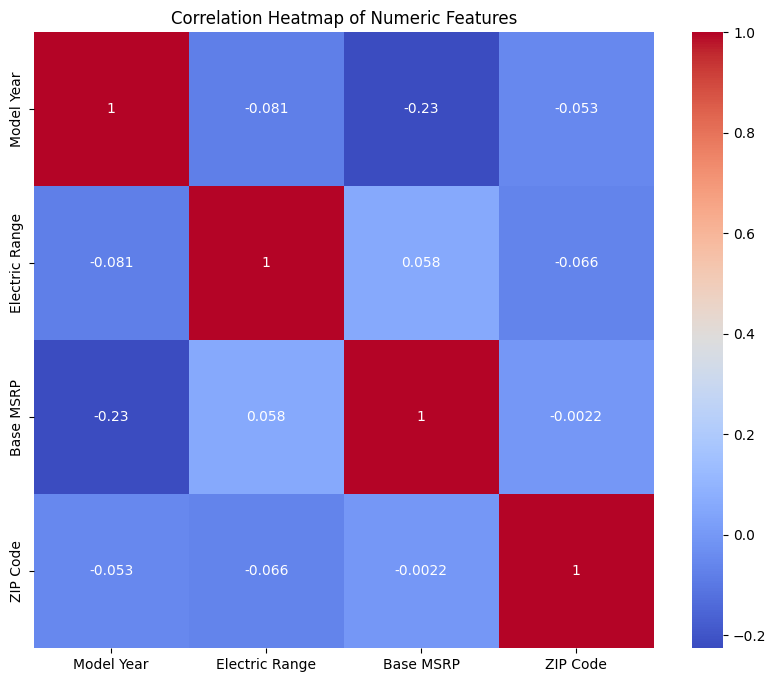

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

def check_multicollinearity(X, threshold=0.8):
    corr_matrix = X[numeric_features].corr()
    high_corr_vars = np.where(np.abs(corr_matrix) > threshold)
    high_corr_vars = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_vars) if x != y and x < y]
    return high_corr_vars

multicollinear_features = check_multicollinearity(X)
print("Highly correlated feature pairs:", multicollinear_features)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

This image is a **correlation heatmap** that visually represents the pairwise correlation coefficients between four numeric features: "Model Year", "Electric Range", "Base MSRP", and "ZIP Code".

Here's an interpretation of the plot:

1.  **Color Scale:**
    * The color bar on the right indicates the strength and direction of the correlation.
    * **Red shades** represent positive correlations (as one variable increases, the other tends to increase). A value of +1 (darkest red) indicates a perfect positive correlation.
    * **Blue shades** represent negative correlations (as one variable increases, the other tends to decrease). A value of -1 (darkest blue) would indicate a perfect negative correlation. In this specific plot, the scale goes down to approximately -0.2.
    * **Colors closer to white** (around 0) indicate a weak or no linear correlation.

2.  **Diagonal:**
    * The diagonal squares from the top-left to the bottom-right all have a value of **1** (dark red). This is because each feature is perfectly correlated with itself.

3.  **Interpreting Specific Correlations (Off-Diagonal Squares):**
    * Each square shows the correlation coefficient between the two features that intersect at that square.
    * **Model Year and Electric Range:** -0.081. This is a very weak negative correlation, suggesting that as the model year increases, there's a very slight tendency for the electric range to decrease, or vice-versa. However, the correlation is so close to zero that it's likely insignificant.
    * **Model Year and Base MSRP:** -0.23. This is a weak negative correlation. It suggests a slight tendency for newer model years to have a slightly lower base MSRP, or older model years to have a slightly higher base MSRP within this dataset.
    * **Model Year and ZIP Code:** -0.053. A very weak negative correlation, close to no correlation.
    * **Electric Range and Base MSRP:** 0.058. A very weak positive correlation, indicating a very slight tendency for vehicles with higher electric range to have a higher base MSRP, but this relationship is extremely weak.
    * **Electric Range and ZIP Code:** -0.066. A very weak negative correlation, close to no correlation.
    * **Base MSRP and ZIP Code:** -0.0022. An extremely weak negative correlation, essentially indicating no linear relationship between the base MSRP and the ZIP code.

4.  **Highly correlated feature pairs:**
    * This text at the top of the plot explicitly states that there are no feature pairs considered "highly correlated" based on some predefined threshold (which isn't specified in the image, but is often set at values like > |0.7| or > |0.8|). This aligns with the generally low correlation values seen throughout the heatmap.

**Overall Summary:**

The heatmap indicates that there are **no strong linear relationships** between the plotted numeric features ("Model Year", "Electric Range", "Base MSRP", and "ZIP Code"). Most of the correlations are very close to zero, suggesting that these variables do not strongly influence each other in a linear fashion. The strongest, albeit still weak, correlation observed is a negative one between "Model Year" and "Base MSRP" (-0.23).

This lack of strong correlation can be important for tasks like feature selection in machine learning, as it suggests that these features might provide independent information. However, it's also important to remember that correlation only measures *linear* relationships; non-linear relationships might still exist between these variables.

### **Check correlation between 'Base MSRP' and 'Expected Price'**

In [ ]:
msrp_price_corr, _ = spearmanr(data_no_outliers['Base MSRP'], data_no_outliers[target])
print(f"Correlation between Base MSRP and Expected Price: {msrp_price_corr:.2f}")

Correlation between Base MSRP and Expected Price: -0.14


The correlation coefficient of -0.14 between Base MSRP and Expected Price indicates:

1. ***Weak negative correlation:***
There is a weak inverse relationship between `Base MSRP ` and `Expected Price`.

2. ***Unexpected direction:***
Typically, we might expect a positive correlation between MSRP and price. The negative correlation is somewhat counterintuitive and warrants further investigation.

3. ***Low risk of data leakage:***
With such a weak correlation, there's little concern about data leakage or the Base MSRP directly revealing the Expected Price.

**Potential insights:** This could suggest that higher MSRP vehicles might depreciate more quickly or have lower resale values in the electric vehicle market.
There might be other factors (like incentives, market demand, or regional variations) that have a stronger influence on the Expected Price than the Base MSRP.


**Model considerations:** Keep Base MSRP as a feature, as it likely still contains valuable information for the model.
The weak correlation suggests that the model will need to rely on other features as well to accurately predict the Expected Price.
Consider creating interaction terms or transformed versions of Base MSRP to capture any non-linear relationships with the target variable.

### **Further investigation:**

We have to isualize this relationship with a scatter plot to check for any non-linear patterns.
Segmenting the data by other variables (e.g., Make, Model Year) could reveal if this relationship varies across different subgroups.

Base MSRP                int64
Expected Price ($1k)    object
dtype: object


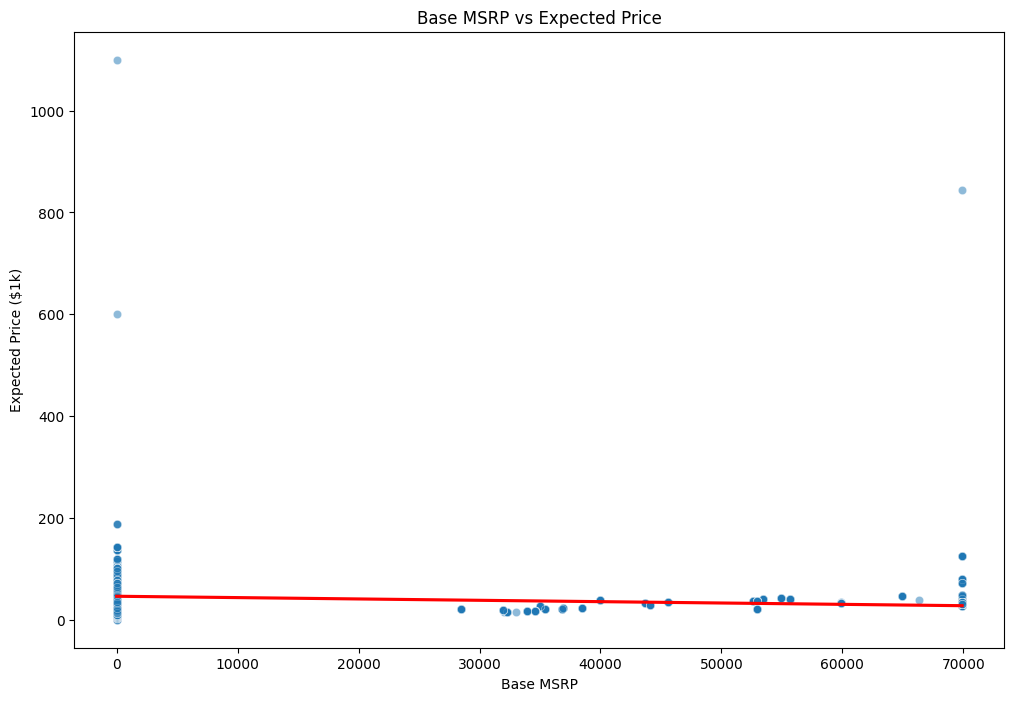

Number of data points plotted: 64340
Correlation: -0.1238


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# First, let's check the data types
print(data_no_outliers[['Base MSRP', 'Expected Price ($1k)']].dtypes)

# Convert to numeric, coercing errors to NaN
data_no_outliers['Base MSRP'] = pd.to_numeric(data_no_outliers['Base MSRP'], errors='coerce')
data_no_outliers['Expected Price ($1k)'] = pd.to_numeric(data_no_outliers['Expected Price ($1k)'], errors='coerce')

# Remove any rows with NaN values
data_plot = data_no_outliers.dropna(subset=['Base MSRP', 'Expected Price ($1k)'])

# Create the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Base MSRP', y='Expected Price ($1k)', data=data_plot, alpha=0.5)
plt.title('Base MSRP vs Expected Price')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Expected Price ($1000)')

# Add a trend line
sns.regplot(x='Base MSRP', y='Expected Price ($1k)', data=data_plot, scatter=False, color='red')

plt.show()

# Print some statistics
print(f"Number of data points plotted: {len(data_plot)}")
print(f"Correlation: {data_plot['Base MSRP'].corr(data_plot['Expected Price ($1k)']):.4f}")

This visualization offers several important insights about the relationship between `Base MSRP ` & `Expected Price`:

1. Clustering at low MSRP: There's a large cluster of data points at very low Base MSRP values (close to 0 dollars). any vehicles in the dataset have no or very low Base MSRP recorded.
2. Wide range of Expected Prices: For vehicles with low Base MSRP, there's a wide range of Expected Prices, from very low to over 1,000,000 dollars.
3. Outliers: There are a few notable outliers, particularly vehicles with high
Expected Prices (around 600,000; 800,000 & over 1,000,000 dollars) but low `Base MSRP`.
4. Sparse high MSRP data: There are relatively few data points for higher Base MSRP values, and they seem to have lower `Expected Prices` compared to some of the low MSRP vehicles.
5. Non-linear relationship: The relationship doesn't appear to be linear. The red trend line is nearly flat, which explains the weak correlation we observed earlier.
6. Data quality concerns: The clustering at low MSRP and the presence of extreme outliers suggest there might be data quality issues or missing information in the `Base MSRP` field.


# **Split Dataset to Training & Test Sets**
**Methodology:**

1. Uses the encoded_data DataFrame that are already prepared with label encoding.
2. Selects only the features  specified in feature selection process.
3. Prepares the feature matrix X and target variable y.
4. Splits the data into training (80%) and testing (20%) sets.
5. Prints the shapes of the resulting training and testing sets to verify the split.
6. Prints the first few rows of X_train to verify that the correct features were selected.
7. Prints summary statistics of y_train to give an overview of the target variable distribution.

In [ ]:
from sklearn.model_selection import train_test_split
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features based on feature selection
selected_features = [
    'Model Year', 'Electric Range', 'Base MSRP', 'ZIP Code',
    'Make', 'Model', 'Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'County', 'City', 'State', 'Electric Utility'
]

# Prepare the feature matrix X and target variable y
X = encoded_data[selected_features]
y = encoded_data['Expected Price ($1k)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Dataset shapes:")
display(pd.DataFrame({
    'Dataset': ['X_train', 'X_test', 'y_train', 'y_test'],
    'Shape': [X_train.shape, X_test.shape, y_train.shape, y_test.shape]
}))

# Display the first few rows of X_train
print("\nFirst few rows of X_train:")
display(X_train.head())

# Display summary statistics of y_train
print("\nSummary statistics of y_train (Expected Price):")
display(y_train.describe())

# Display feature information
print("\nFeature Information:")
feature_info = pd.DataFrame({
    'Feature': X.columns,
    'Type': X.dtypes,
    'Non-Null Count': X.notnull().sum(),
    'Null Count': X.isnull().sum()
})
display(feature_info)



Dataset shapes:


,Dataset,Shape
0,X_train,"(51482, 12)"
1,X_test,"(12871, 12)"
2,y_train,"(51482,)"
3,y_test,"(12871,)"



First few rows of X_train:


,Model Year,Electric Range,Base MSRP,ZIP Code,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,County,City,State,Electric Utility
57702,2018.0,249,0,98382.0,28,58,0,0,22,439,35,30
49301,2020.0,25,0,98277.0,30,71,1,2,57,326,35,65
36644,2022.0,0,0,98030.0,28,60,0,1,60,233,35,66
26381,2022.0,0,0,98059.0,28,60,0,1,60,393,35,66
58525,2018.0,47,0,98258.0,11,22,1,0,120,245,35,65



Summary statistics of y_train (Expected Price):


,Expected Price ($1k)
count,51482.000000
mean,120.954839
std,58.361627
min,0.000000
25%,65.000000
50%,132.000000
75%,176.000000
max,209.000000



Feature Information:


,Feature,Type,Non-Null Count,Null Count
Model Year,Model Year,float64,64353,0
Electric Range,Electric Range,int64,64353,0
Base MSRP,Base MSRP,int64,64353,0
ZIP Code,ZIP Code,float64,64353,0
Make,Make,int64,64353,0
Model,Model,int64,64353,0
Electric Vehicle Type,Electric Vehicle Type,int64,64353,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,Clean Alternative Fuel Vehicle (CAFV) Eligibility,int64,64353,0
County,County,int64,64353,0
City,City,int64,64353,0



Correlation Matrix of Numeric Features:


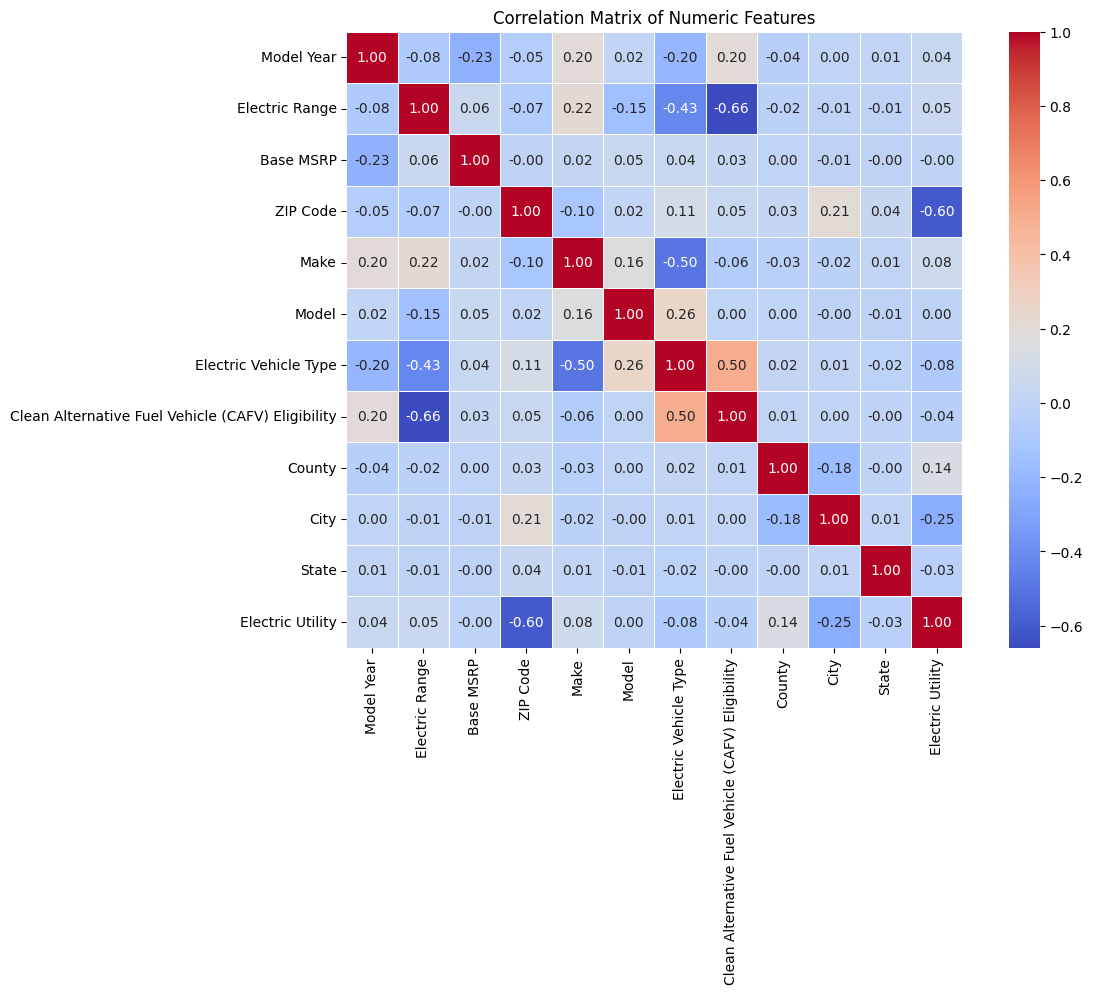

In [ ]:
# Plot the correlation matrix as a heatmap
print("\nCorrelation Matrix of Numeric Features:")
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = X[numeric_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Insights:

1. **Electric Range and Clean Alternative Fuel Vehicle (CAFV) Eligibility**:
   - There is a strong negative correlation (-0.66), indicating that as the electric range increases, the likelihood of a vehicle being classified as a CAFV decreases.

2. **ZIP Code and Electric Utility**:
   - There is a strong negative correlation (-0.60), indicating that certain ZIP Codes are associated with specific electric utilities.

3. **Electric Vehicle Type and Electric Range**:
   - A moderate negative correlation (-0.43) suggests that all-electric vehicles tend to have a higher electric range compared to plug-in hybrids.

4. **Electric Vehicle Type and Clean Alternative Fuel Vehicle (CAFV) Eligibility**:
   - A moderate positive correlation (0.50) suggests that certain types of electric vehicles are more likely to be classified as CAFVs.

5. **Model Year and Make**:
   - A weak positive correlation (0.20) suggests that newer model years are slightly associated with certain makes.

6. **Base MSRP**:
   - Generally shows weak correlations with other features, indicating that the base MSRP is not strongly correlated with other numeric features in this dataset.

# **Build and train the SVM model on the training set.**
**Methodology**:
1. Standardize the features: We use the `StandardScaler` from scikit-learn to standardize the features in the training and testing sets.
2. Create and train the SVM model: We create an instance of the `SVR` (Support Vector Regression) class from scikit-learn's svm module. This is the regression version of the Support Vector Machine algorithm, which is suitable for the price prediction task. We then fit the model to the training data using the `fit()` method.

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

# Print the model details
print("SVM Model Details:")
print(svm_model)
print("\nSVM Model Hyperparameters:")
for param, value in svm_model.get_params().items():
    print(f"{param}: {value}")

SVM Model Details:
SVR()

SVM Model Hyperparameters:
C: 1.0
cache_size: 200
coef0: 0.0
degree: 3
epsilon: 0.1
gamma: scale
kernel: rbf
max_iter: -1
shrinking: True
tol: 0.001
verbose: False


# **Evaluate the model's performance on the test set.**
Next we want to evaluate the performance of the trained model on the test set. This is done by making predictions on the test set and computing various evaluation metrics, such as *Mean Squared Error* (MSE), *Root Mean Squared Error* (RMSE), or *R-squared*.

Model Evaluation:
Mean Squared Error (MSE): 1106.68
Root Mean Squared Error (RMSE): 33.27
R-squared (R2): 0.67


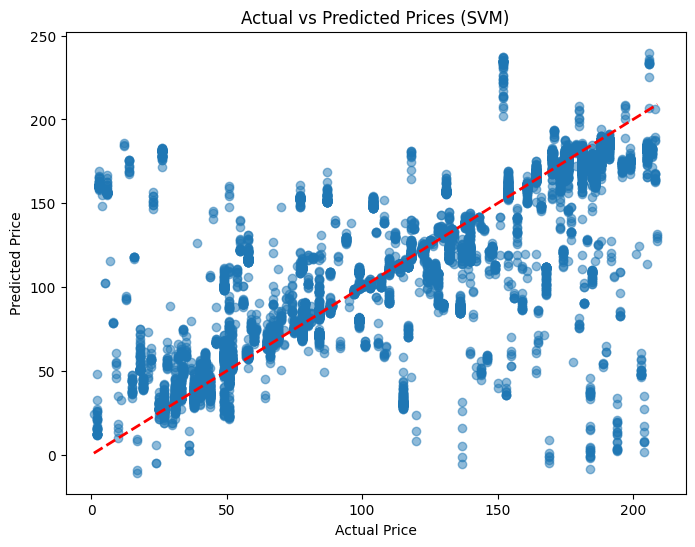

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for the sqrt function

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE using numpy's sqrt
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (SVM)')
plt.show()

# **Model Evaluation:**

Mean Squared Error (MSE): 1106.68
Root Mean Squared Error (RMSE): 33.27
R-squared (R2): 0.67

These metrics indicate the following:

- The MSE of 1106.68 means the average squared difference between the actual and predicted prices is around 1,106 dollars.
- The RMSE of 33.27 suggests the average difference between the actual and predicted prices is around $33.
- The R-squared value of 0.67 implies the SVM model can explain about 67% of the variation in the target variable (Expected Price).


## **Scatter Plot:**
There is a generally positive relationship between the actual and predicted prices, with the points scattered around the perfect prediction line (y = x, shown in red).
However, there are some outliers and points that deviate significantly from the perfect prediction line, indicating the model still has room for improvement in accurately predicting certain data points.

# **Conclusion**
Overall, the model evaluation metrics and the scatter plot provide a good overview of the SVM model's performance on the test set. The R-squared value of 0.67 suggests the model is reasonably effective in predicting the expected prices, but the presence of outliers and scatter around the perfect prediction line indicates there is still room for improvement, potentially through further feature engineering, hyperparameter tuning, or exploring other machine learning algorithms.